-- Jelena Lor --

I am finance professional passionate about Data Science/ Analytics.

_May 2019_

This is my first attempt at this dataset. I am trying to get better at analyzing and visualizing data. Here I am exploring interactive charts capabilities. <br> 
Unfortunately interactive widgets do not work with Kaggle servers but you can run it locally to explore the visualizations.
<br>
<br>
Any feedback or comments are highly appreciated!


-- Jacob Ayers --
<br>
_October_2022_
<br>
Lightly modified for the Correlates of War project's Trade (v4.0) dataset

__Table of Content__

1. Library Import
2. Data Import
3. Data Wrangling
4. Code
5. Visualisation

## 1. Library Import

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid",{'axes.axisbelow': False,'grid.color': 'w','axes.spines.bottom': False, 'axes.spines.left': False, 'axes.spines.right': False,
 'axes.spines.top': False})
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, widgets, Layout
import geopandas as gpd

## 2. Data Import

In [47]:
data2 = pd.read_csv("National_Import_Export.csv")
# Import Geopandas World Dataset to map countries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

## 3. Data Wrangling

In [48]:
# Make the name of the countries consistent across both datasets
country_mapping = {"Bosnia and Herzegovina":"Bosnia and Herz.", "Czech Republic":"Czech Rep.", 
                   "Dominica":"Dominican Rep.", "Russian Federation":"Russia"}

## 4. Code

In [67]:
def mapImportExportByYear(year, category, normalization):
    fig, ax = plt.subplots(figsize = (18, 8))
    year_subset = data2[data2["year"]==year]
    vmin = None
    vmax = None
    
    if normalization and category != "net(exports-imports)":
        year_subset[category] = year_subset[category]/year_subset[category].sum()
        vmin = 0.0
        vmax = 0.30
        
    elif category == "net(exports-imports)" and not normalization:
        # forcing the center to be zero
        vmax = min(year_subset[category].max(),abs(year_subset[category].min()))
        vmin = vmax * -1
    # this will create a biased normalization since the net pos and net negatives will be different
    # but in both cases I am normalizing them down to [-1,1]
    elif category == "net(exports-imports)" and normalization:
        year_subset[category] = year_subset[category]/(year_subset["imports"]+year_subset["exports"])
        vmin = -1
        vmax = 1
            
    
    data_pivot_total = pd.pivot_table(year_subset, index = "country", values = category,
                                     aggfunc = "sum", fill_value = 0)
    
    world_subplot = world.merge(data_pivot_total, left_on="name",right_on = "country", how="left").fillna(value=0)
    print(category)
    world_subplot.plot(ax=ax,legend=True,vmin = vmin,vmax=vmax,column=category,cmap="coolwarm",edgecolor = "0.8")
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Year: " + str(year), fontsize = 20, loc = "left")
    
    #print("Top 5 countries")
    
    top5 = data_pivot_total.sort_values(by = category , ascending = False)[:5]
    i = 1
    print("Highest 5 - ")
    for c, v in zip(top5.index, top5[category].values):
        
        test = ''
        test = str(round(v,3))
        if normalization != "none":
            test = str(round(v*100.0,3))+'%'
        print(str(i) + ". " + str(c) + " - " + test)
        i += 1
    if category == "net(exports-imports)" and normalization:
        print("\n\n Lowest 5 - ")
        top5 = data_pivot_total.sort_values(by = category , ascending = True)[:5]

        i = 1
        for c, v in zip(top5.index, top5[category].values):
            test = ''
            test = str(round(v,3))
            if normalization != "none":
                test = str(round(v*100.0,3))+'%'
            print(str(i) + ". " + str(c) + " - " + test)
            i += 1
    plt.show()

mapByYear = interactive(mapImportExportByYear, 
                        year = widgets.IntSlider(min = 1870, max = 2014, step = 1, value = 10),
                        category=widgets.Dropdown(options=["imports","exports","net(exports-imports)","imports_yearly_difference","exports_yearly_difference","net(exports-imports)_yearly_difference"],value="imports",description="Display Info: ",disabled=False),
                        normalization=widgets.Dropdown(options=[False,True],value=False,description="Normalization",disabled=False))

## 5. Visualization

In [68]:
mapByYear

interactive(children=(IntSlider(value=1870, description='year', max=2014, min=1870), Dropdown(description='Dis…

In [69]:
def mapImportExportByYearAnimation(year, category, normalization):
    fig, ax = plt.subplots(figsize = (18, 8))
    year_subset = data2[data2["year"]==year]
    vmin = None
    vmax = None
    
    if normalization and category != "net(exports-imports)":
        year_subset[category] = year_subset[category]/year_subset[category].sum()
        vmin = 0.0
        vmax = 0.30
        
    elif category == "net(exports-imports)" and not normalization:
        # forcing the center to be zero
        vmax = min(year_subset[category].max(),abs(year_subset[category].min()))
        vmin = vmax * -1
    # this will create a biased normalization since the net pos and net negatives will be different
    # but in both cases I am normalizing them down to [-1,1]
    elif category == "net(exports-imports)" and normalization:
        year_subset[category] = year_subset[category]/(year_subset["imports"]+year_subset["exports"])
        vmin = -1
        vmax = 1
            
    
    data_pivot_total = pd.pivot_table(year_subset, index = "country", values = category,
                                     aggfunc = "sum", fill_value = 0)
    
    world_subplot = world.merge(data_pivot_total, left_on="name",right_on = "country", how="left").fillna(value=0)
    print(category)
    world_subplot.plot(ax=ax,legend=True,vmin = vmin,vmax=vmax,column=category,cmap="coolwarm",edgecolor = "0.8")
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Year: " + str(year), fontsize = 20, loc = "left")
    
    #print("Top 5 countries")
    
    top5 = data_pivot_total.sort_values(by = category , ascending = False)[:5]
    i = 1
    print("Highest 5 - ")
    for c, v in zip(top5.index, top5[category].values):
        
        test = ''
        test = str(round(v,3))
        if normalization != "none":
            test = str(round(v*100.0,3))+'%'
        print(str(i) + ". " + str(c) + " - " + test)
        i += 1
    if category == "net(exports-imports)" and normalization:
        print("\n\n Lowest 5 - ")
        top5 = data_pivot_total.sort_values(by = category , ascending = True)[:5]

        i = 1
        for c, v in zip(top5.index, top5[category].values):
            test = ''
            test = str(round(v,3))
            if normalization != "none":
                test = str(round(v*100.0,3))+'%'
            print(str(i) + ". " + str(c) + " - " + test)
            i += 1
    plt.savefig("./net_range_normalization/"+category+'_'+str(year)+'.png')
    
mapByYearAnimation = interactive(mapImportExportByYearAnimation, 
                        year = widgets.IntSlider(min = 1870, max = 2014, step = 1, value = 10),
                        category=widgets.Dropdown(options=["imports","exports","net(exports-imports)","imports_yearly_difference","exports_yearly_difference","net(exports-imports)_yearly_difference"],value="imports",description="Display Info: ",disabled=False),
                        normalization=widgets.Dropdown(options=[False,True],value=False,description="Normalization",disabled=False))

In [70]:
mapByYearAnimation

interactive(children=(IntSlider(value=1870, description='year', max=2014, min=1870), Dropdown(description='Dis…

# Line Graphs

Text(0, 0.5, 'net(exports-imports)')

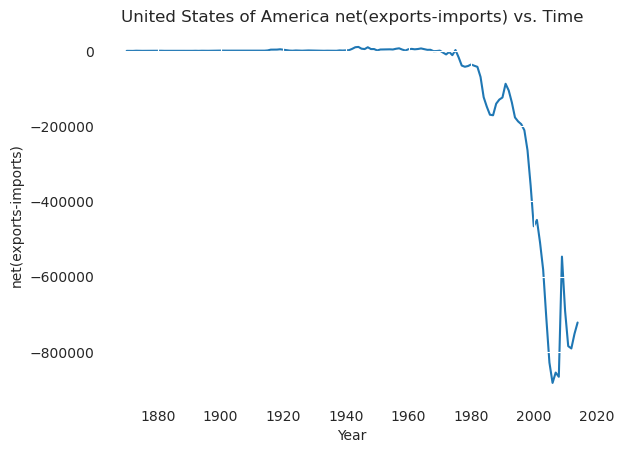

In [60]:
country = "United States of America"
category = "net(exports-imports)"
plt.figure()
plt.plot(data2[data2["country"] == country]["year"],data2[data2["country"] == country][category])
plt.title(country + ' ' + category +" vs. Time")
plt.xlabel("Year")
plt.ylabel(category)